# Concrete Strength Prediction

Concrete is the most important material in civil engineering.<br><br><br>
**We will be predicting strength of Concrete based on certain features**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df = pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Exploratory Data Analysis

In [4]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
#Description of dataset
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#Shape of the dataset
df.shape

(1030, 9)

In [7]:
#Finding Missing values
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [8]:
#Correlation of data
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

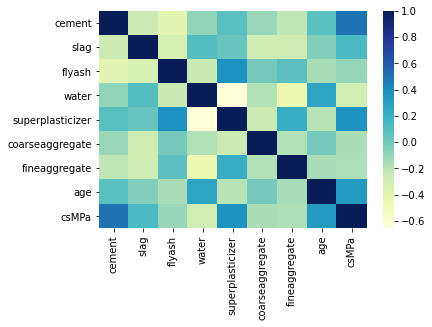

In [9]:
#Correlation Visualisation
sns.heatmap(df.corr(),cmap='YlGnBu')

## Modelling

In [10]:
#Creating X and y
X = df.drop(['csMPa'],axis=1)
y = df['csMPa']

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Standardizing the data

In [13]:
#Scaling the Data (MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler

In [14]:
#Initializing scaler
scaler = MinMaxScaler()

In [15]:
#Training Data scaled
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
#Testing Data scaled
X_test_scaled = scaler.transform(X_test)

### Model Building (ANN)

In [17]:
#Importing Models and Layers

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [18]:
#Initializing ANN
model = Sequential()

#Input and Hidden Layer
model.add(Dense(input_dim=8,activation='relu',units=4,kernel_initializer='uniform'))

#Second Hidden Layer
model.add(Dense(activation='relu',units=4,kernel_initializer='uniform'))

#Third Hidden Layer
model.add(Dense(activation='relu',units=4,kernel_initializer='uniform'))

#Output Layer
#No activation function as problem is of regression
model.add(Dense(units=1))

In [19]:
#Compiling the model
#loss = 'mse' (regression problem)
model.compile(optimizer='adam',loss='mse')

In [20]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Early Stopping Callback
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
#Initializing EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#### Fitting the Model

In [23]:
model.fit(X_train_scaled,y_train,
          validation_data=(X_test_scaled,y_test),
         batch_size=64,epochs=600,
         callbacks=[early_stop])

#This validation test is just for knowing how is model performing after training each epoch
#It is no where related to model training

Epoch 1/600
12/12 [==============================] - 1s 15ms/step - loss: 1588.3738 - val_loss: 1496.7290
Epoch 2/600
12/12 [==============================] - 0s 2ms/step - loss: 1586.8564 - val_loss: 1495.2079
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 1585.2439 - val_loss: 1493.5796
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 1583.4884 - val_loss: 1491.8064
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 1581.5702 - val_loss: 1489.8116
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 1579.3948 - val_loss: 1487.5665
Epoch 7/600
12/12 [==============================] - 0s 2ms/step - loss: 1576.9380 - val_loss: 1484.9838
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 1574.1184 - val_loss: 1481.9941
Epoch 9/600
12/12 [==============================] - 0s 3ms/step - loss: 1570.8353 - val_loss: 1478.5205
Epoch 10/600
12/12 [==============================] - 

12/12 [==============================] - 0s 4ms/step - loss: 233.9430 - val_loss: 226.9540
Epoch 80/600
12/12 [==============================] - 0s 4ms/step - loss: 233.2868 - val_loss: 226.3152
Epoch 81/600
12/12 [==============================] - 0s 3ms/step - loss: 232.5381 - val_loss: 225.8555
Epoch 82/600
12/12 [==============================] - 0s 4ms/step - loss: 231.8131 - val_loss: 225.3505
Epoch 83/600
12/12 [==============================] - 0s 3ms/step - loss: 231.1550 - val_loss: 224.9377
Epoch 84/600
12/12 [==============================] - 0s 2ms/step - loss: 230.3826 - val_loss: 224.1381
Epoch 85/600
12/12 [==============================] - 0s 2ms/step - loss: 229.6425 - val_loss: 223.5610
Epoch 86/600
12/12 [==============================] - 0s 3ms/step - loss: 228.9214 - val_loss: 222.9457
Epoch 87/600
12/12 [==============================] - 0s 2ms/step - loss: 228.2508 - val_loss: 222.3962
Epoch 88/600
12/12 [==============================] - 0s 2ms/step - loss: 227

12/12 [==============================] - 0s 3ms/step - loss: 176.9299 - val_loss: 180.5247
Epoch 158/600
12/12 [==============================] - 0s 3ms/step - loss: 176.0870 - val_loss: 179.7776
Epoch 159/600
12/12 [==============================] - 0s 3ms/step - loss: 175.2853 - val_loss: 179.0403
Epoch 160/600
12/12 [==============================] - 0s 3ms/step - loss: 174.6049 - val_loss: 178.1983
Epoch 161/600
12/12 [==============================] - 0s 6ms/step - loss: 173.9373 - val_loss: 177.7807
Epoch 162/600
12/12 [==============================] - 0s 3ms/step - loss: 173.1350 - val_loss: 177.0137
Epoch 163/600
12/12 [==============================] - 0s 3ms/step - loss: 172.5075 - val_loss: 176.2368
Epoch 164/600
12/12 [==============================] - 0s 3ms/step - loss: 171.6989 - val_loss: 175.6567
Epoch 165/600
12/12 [==============================] - 0s 8ms/step - loss: 170.9815 - val_loss: 175.1912
Epoch 166/600
12/12 [==============================] - 0s 5ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 129.4296 - val_loss: 138.5404
Epoch 236/600
12/12 [==============================] - 0s 3ms/step - loss: 129.1568 - val_loss: 138.1104
Epoch 237/600
12/12 [==============================] - 0s 3ms/step - loss: 128.7078 - val_loss: 137.9370
Epoch 238/600
12/12 [==============================] - 0s 3ms/step - loss: 128.3618 - val_loss: 137.6063
Epoch 239/600
12/12 [==============================] - 0s 3ms/step - loss: 128.0258 - val_loss: 137.2025
Epoch 240/600
12/12 [==============================] - 0s 3ms/step - loss: 127.7947 - val_loss: 136.7112
Epoch 241/600
12/12 [==============================] - 0s 3ms/step - loss: 127.2969 - val_loss: 136.4158
Epoch 242/600
12/12 [==============================] - 0s 3ms/step - loss: 126.9672 - val_loss: 136.1611
Epoch 243/600
12/12 [==============================] - 0s 3ms/step - loss: 126.7076 - val_loss: 135.7303
Epoch 244/600
12/12 [==============================] - 0s 3ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 116.7303 - val_loss: 123.3629
Epoch 314/600
12/12 [==============================] - 0s 3ms/step - loss: 116.6807 - val_loss: 123.1884
Epoch 315/600
12/12 [==============================] - 0s 3ms/step - loss: 116.6347 - val_loss: 123.0608
Epoch 316/600
12/12 [==============================] - 0s 5ms/step - loss: 116.5682 - val_loss: 122.8920
Epoch 317/600
12/12 [==============================] - 0s 3ms/step - loss: 116.4866 - val_loss: 122.8205
Epoch 318/600
12/12 [==============================] - 0s 4ms/step - loss: 116.4122 - val_loss: 122.7548
Epoch 319/600
12/12 [==============================] - 0s 4ms/step - loss: 116.4183 - val_loss: 122.7791
Epoch 320/600
12/12 [==============================] - 0s 4ms/step - loss: 116.3746 - val_loss: 122.7468
Epoch 321/600
12/12 [==============================] - 0s 4ms/step - loss: 116.2710 - val_loss: 122.5846
Epoch 322/600
12/12 [==============================] - 0s 4ms/step - 

12/12 [==============================] - 0s 4ms/step - loss: 113.6298 - val_loss: 117.8832
Epoch 392/600
12/12 [==============================] - 0s 5ms/step - loss: 113.7448 - val_loss: 117.8138
Epoch 393/600
12/12 [==============================] - 0s 6ms/step - loss: 113.6028 - val_loss: 117.7857
Epoch 394/600
12/12 [==============================] - 0s 3ms/step - loss: 113.7200 - val_loss: 117.8743
Epoch 395/600
12/12 [==============================] - 0s 4ms/step - loss: 113.5459 - val_loss: 117.7247
Epoch 396/600
12/12 [==============================] - 0s 3ms/step - loss: 113.6528 - val_loss: 117.7503
Epoch 397/600
12/12 [==============================] - 0s 4ms/step - loss: 113.5672 - val_loss: 117.7310
Epoch 398/600
12/12 [==============================] - 0s 4ms/step - loss: 113.5223 - val_loss: 117.7845
Epoch 399/600
12/12 [==============================] - 0s 3ms/step - loss: 113.5157 - val_loss: 117.5969
Epoch 400/600
12/12 [==============================] - 0s 4ms/step - 

We can see that final no. of epochs is 465 where loss is not minimizing now !

In [25]:
#Training Loss and Validation Loss
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,1588.373779,1496.729004
1,1586.856445,1495.207886
2,1585.243896,1493.579590
3,1583.488403,1491.806396
4,1581.570190,1489.811646
...,...,...
460,112.078056,115.493172
461,112.077789,115.538559
462,112.090500,115.492859
463,112.024551,115.488876


<AxesSubplot:>

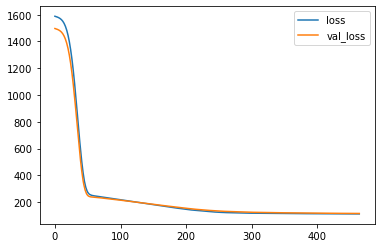

In [26]:
losses.plot()

#Perfect behaviour where the training loss is also decreasing with validation loss

### Evaluation Metrics

1. Mean Absolute Error
2. Mean Squared Error
3. Explained Variance Score

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [32]:
#Making Predictions
predictions = model.predict(X_test_scaled)

In [33]:
#Mean Absolute error
mean_absolute_error(y_test,predictions)

8.590451662995669

In [34]:
#Mean Squared Error
mean_squared_error(y_test,predictions)

115.43453720117847

In [35]:
df['csMPa'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: csMPa, dtype: float64

We can see that Average is around 36% whereas mean absolute error is 8% which is around 22% of average value. The model is not so great but not worst also

In [36]:
#Explained Variance score
explained_variance_score(y_test,predictions)

0.5740247663638693

In [41]:
model.metrics_names

['loss']

In [40]:
model.evaluate(X_test_scaled,y_test)

10/10 [==============================] - 0s 0s/step - loss: 115.4345


115.43453979492188

### Saving Model


In [37]:
model.save('Concrete Strength Predictor Model.h5')

### Loading Trained Model

In [38]:
from tensorflow.keras.models import load_model

In [39]:
trained_model = load_model('Concrete Strength Predictor Model.h5')

In [42]:
trained_model.evaluate(X_test_scaled,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 115.4345


115.43453979492188

### Prediction on new data

In [46]:
X_test.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28


In [47]:
#Taking it as new data
new_data = X_test.iloc[0]

In [48]:
new_data

cement              266.0
slag                114.0
flyash                0.0
water               228.0
superplasticizer      0.0
coarseaggregate     932.0
fineaggregate       670.0
age                 365.0
Name: 31, dtype: float64

In [50]:
new_data_scaled = scaler.transform([new_data])

In [51]:
trained_model.predict(new_data_scaled)

array([[60.66418]], dtype=float32)

Therefore, for this new data the concrete strength is around 60.67